<a href="https://colab.research.google.com/github/almirteixeira/IcyLowestPython/blob/main/C%C3%B3pia_de_Levitador_Magn%C3%A9tico_ENGG23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy matplotlib numpy control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt


system_params = {
    'g': 9.81,
    'c': 0.15,
    'm': 0.12,
    'a': 0.95,
    'b': 6.28,
}


def system_update(t, x, u, params):
    y = x[0]
    ydot = x[1]
    g, c, m, a, b = map(params.get, ['g', 'c', 'm', 'a', 'b'])
    yddot = -g - (c/m)*ydot + (1/(a*m*((y+b)**4)))*u[0]
    return np.array([ydot, yddot])


def system_output(t, x, u, params):
    return np.array([x[0], x[1]])


nonlinear_system = ct.nlsys(
    system_update,
    system_output,
    name='nonlinear_system',
    params=system_params,
    states=['y', 'ydot'],
    outputs=['y', 'ydot'],
    inputs=['i']
)
print(nonlinear_system)

<NonlinearIOSystem>: nonlinear_system
Inputs (1): ['i']
Outputs (2): ['y', 'ydot']
States (2): ['y', 'ydot']
Parameters: ['g', 'c', 'm', 'a', 'b']

Update: <function system_update at 0x7ea39f73a520>
Output: <function system_output at 0x7ea39f7393a0>


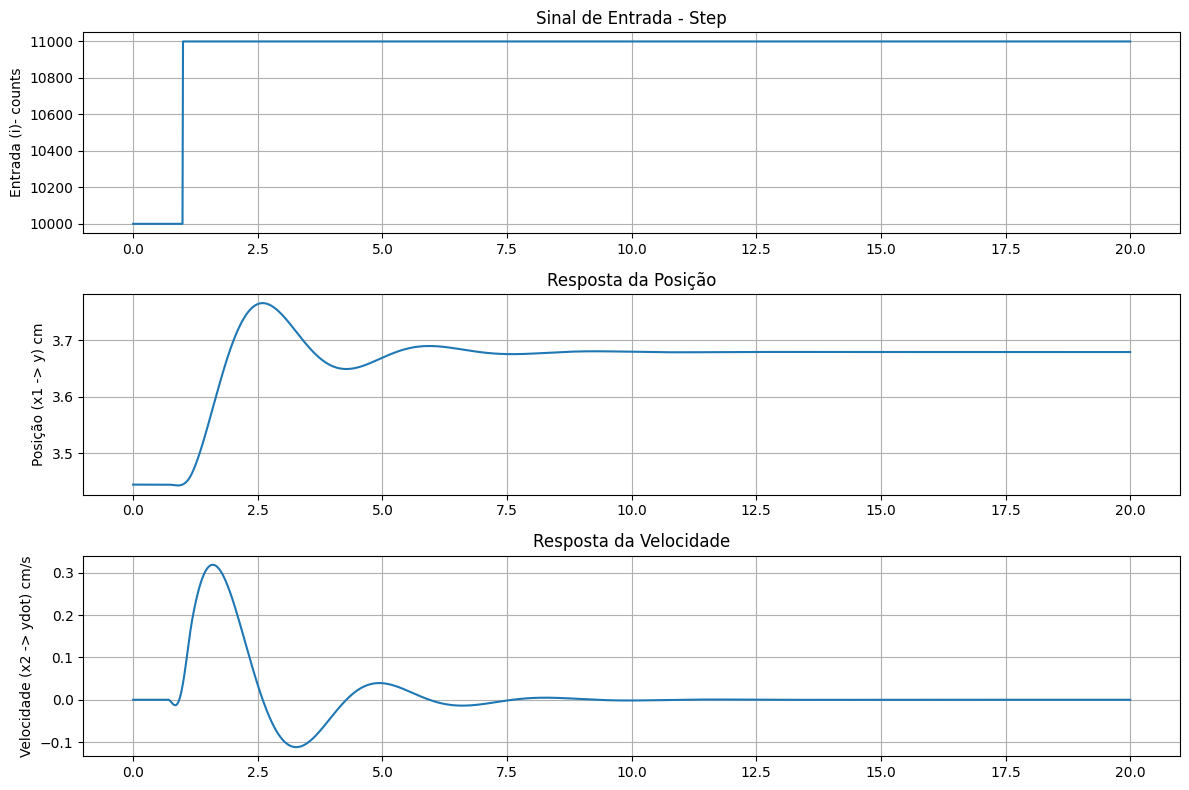

Valor final da posição: 3.6787
Valor final da velocidade: -0.0000
Valor máximo da posição: 3.7653
Valor máximo da velocidade: 0.3194
Valor mínimo da velocidade: -0.1122


In [ ]:

x0 = [3.4442, 0]

t = np.linspace(0, 20, 2000)

time_signal = t
input_signal = np.ones(len(t)) * 10000

input_signal = np.where(t < 1, 10000, 11000)

response = ct.input_output_response(
    nonlinear_system,
    time_signal,
    input_signal,
    x0
)

plt.figure(figsize=(12, 8))


# Entrada (i)
plt.subplot(3, 1, 1)
plt.plot(response.time, input_signal)
plt.ylabel('Entrada (i)- counts')
plt.title('Sinal de Entrada - Step')
plt.grid(True)

# Posição
plt.subplot(3, 1, 2)
plt.plot(response.time, response.outputs[0])
plt.ylabel('Posição (x1 -> y) cm')
plt.title('Resposta da Posição')
plt.grid(True)

# Velocidade
plt.subplot(3, 1, 3)
plt.plot(response.time, response.outputs[1])
plt.ylabel('Velocidade (x2 -> ydot) cm/s')
plt.title('Resposta da Velocidade')
plt.grid(True)

plt.tight_layout()
plt.show()


print(f"Valor final da posição: {response.outputs[0][-1]:.4f}")
print(f"Valor final da velocidade: {response.outputs[1][-1]:.4f}")
print(f"Valor máximo da posição: {np.max(response.outputs[0]):.4f}")
print(f"Valor máximo da velocidade: {np.max(response.outputs[1]):.4f}")
print(f"Valor mínimo da velocidade: {np.min(response.outputs[1]):.4f}")

In [ ]:

x0 = [3.4442, 0]
u0 = [10000]
a0 = 1/(system_params['a']*system_params['m']*((x0[0]+system_params['b'])**4))
b0 = 1
b1 = (system_params['c']/system_params['m'])
b2 = ((4*u0[0])/(system_params['a']*system_params['m']*((x0[0] + system_params['b'])**5)))

num = [a0]
den = [b0, b1, b2]
sys = ct.tf(num, den)


print(f"Ganho (K): {a0:.7f}")
print(f"Função de transferência (K): {sys}")






Ganho (K): 0.0009810
Função de transferência (K): <TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        0.000981
  --------------------
  s^2 + 1.25 s + 4.035


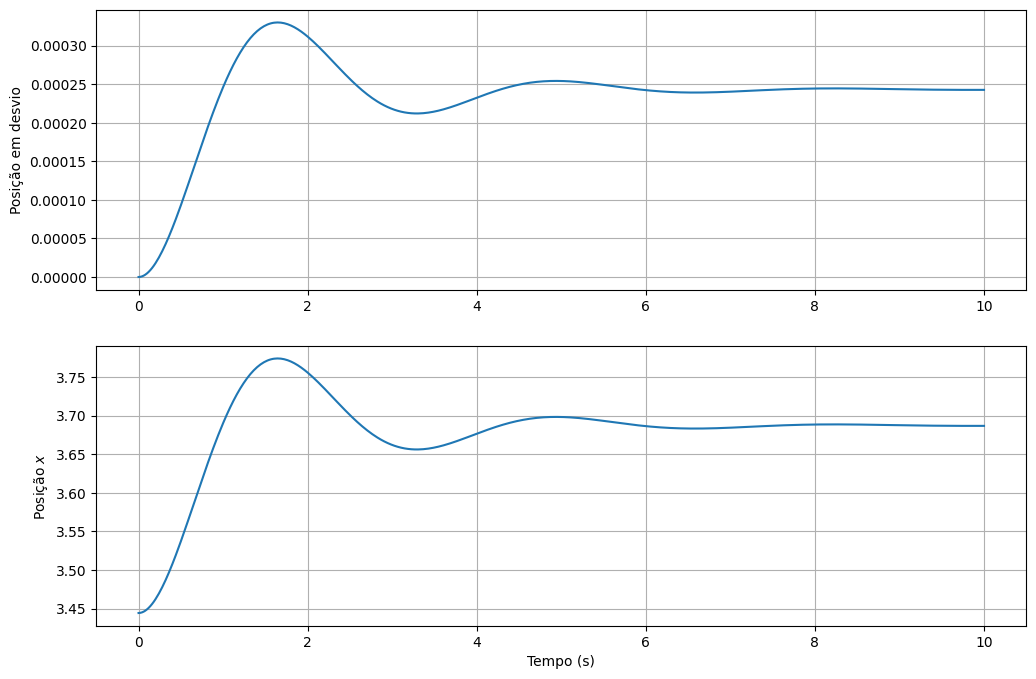

Valor final do sistema linearizado: 3.6868


In [ ]:
DELTA_U = 1000
T = np.linspace(0, 10, 500)

t, y_step = ct.step_response(sys, T)

u_unitario = np.ones_like(t)


y_linear = (y_step * DELTA_U) + 3.4442


plt.figure(figsize=(12, 8))



plt.subplot(2, 1, 1)
plt.plot(t, y_step)
plt.ylabel('Posição em desvio')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y_linear)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição $x$')
plt.grid(True)



plt.show()


print(f"Valor final do sistema linearizado: {y_linear[-1]:.4f}")

In [ ]:
nonlinear_system

<NonlinearIOSystem nonlinear_system: ['i'] -> ['y', 'ydot']>

In [ ]:
sys

TransferFunction(
array([0.00098102]),
array([1.        , 1.25      , 4.03539199]),
outputs=1, inputs=1)

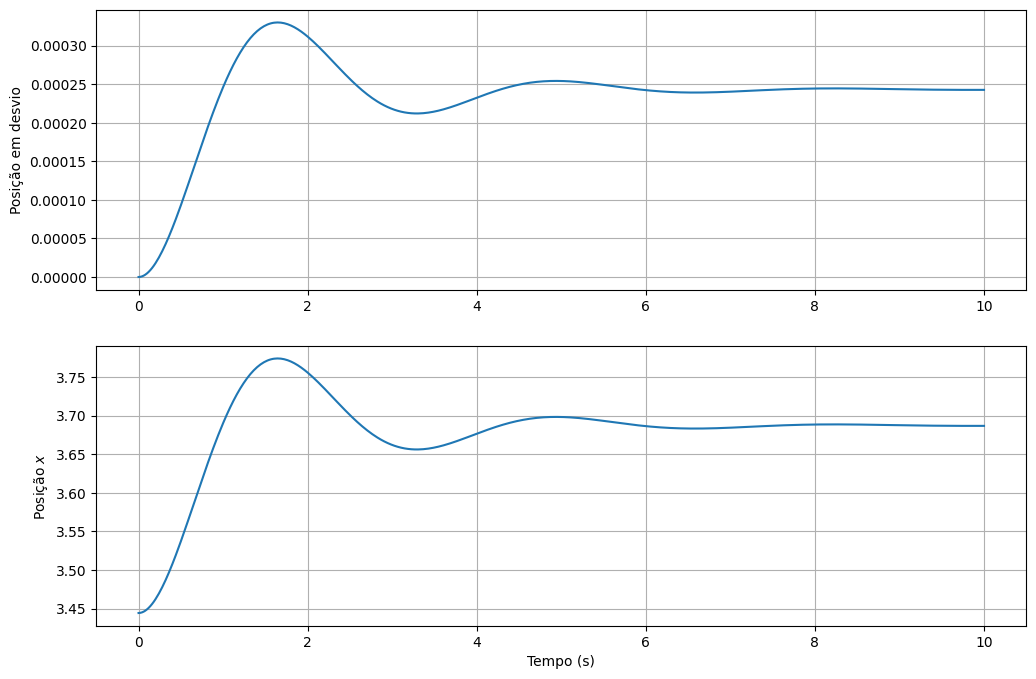

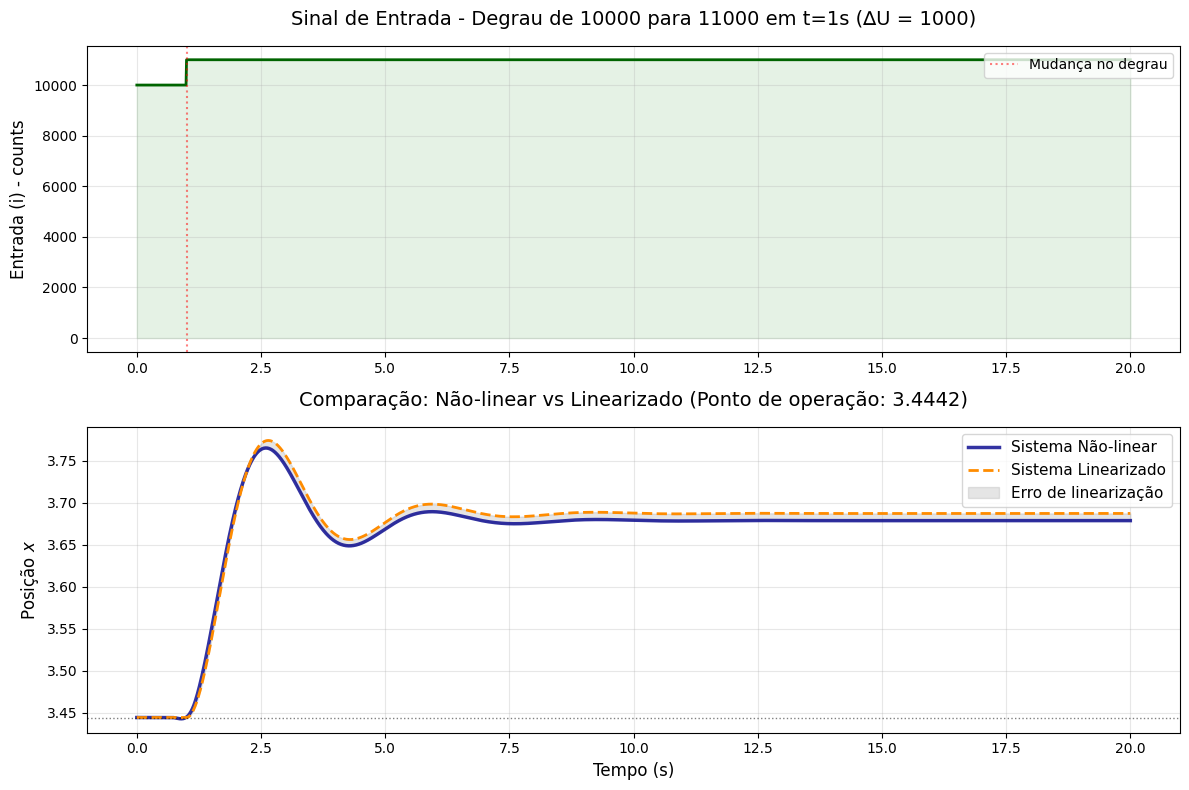

Análise do erro de linearização:
Erro máximo absoluto: 0.012511
Erro médio absoluto: 0.008128
RMS do erro: 0.008439
Erro relativo máximo: 0.33%

Outras métricas:
MSE (Erro Quadrático Médio): 1.253668
RMSE (Raiz do Erro Quadrático Médio): 1.119673
MAE (Erro Absoluto Médio): 1.044084
SS_res (Soma dos Quadrados dos Resíduos): 2507.336559
SS_tot (Soma dos Quadrados Total): 7.962072
R² (cálculo manual): -313.910062


In [ ]:
# Dados iniciais
x0 = [3.4442, 0]
t = np.linspace(0, 20, 2000)
input_signal = np.where(t < 1, 10000, 11000)

# Resposta do sistema não-linear
response = ct.input_output_response(
    nonlinear_system,
    t,
    input_signal,
    x0
)

# Resposta do sistema linear usando a abordagem de linearização
DELTA_U = 1000  # Perturbação do degrau
T_linear = np.linspace(0, 19, 1900)  # Tempo para a resposta linear (de t=1 a t=20)

# Resposta ao degrau unitário do sistema linearizado
t_step, y_step = ct.step_response(sys, T_linear)

# A resposta linear é: ponto_operacao + resposta_ao_degrau * delta_U
# Considerando que o degrau ocorre em t=1
y_linear_full = np.zeros_like(t)

# De t=0 a t=1: valor do ponto de operação
y_linear_full[t < 1] = 3.4442

# De t=1 em diante: resposta à perturbação ∆U = 1000
# A resposta começa em 3.4442 e soma a resposta ao degrau
num_points_after_step = len(t[t >= 1])
if num_points_after_step > len(y_step):
    # Se precisar de mais pontos, interpolar
    from scipy import interpolate
    f = interpolate.interp1d(T_linear, y_step, fill_value="extrapolate")
    y_step_interp = f(t[t >= 1] - 1)  # Subtrai 1 porque a resposta começa em t=1
    y_linear_full[t >= 1] = 3.4442 + y_step_interp * DELTA_U
else:
    y_linear_full[t >= 1] = 3.4442 + y_step[:num_points_after_step] * DELTA_U

# Gráfico com ambos os sinais juntos
plt.figure(figsize=(12, 8))

# Sinal de entrada
plt.subplot(2, 1, 1)
plt.plot(t, input_signal, color='darkgreen', linewidth=2)
plt.fill_between(t, input_signal, alpha=0.1, color='green')
plt.ylabel('Entrada (i) - counts', fontsize=12)
plt.title('Sinal de Entrada - Degrau de 10000 para 11000 em t=1s (∆U = 1000)', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.axvline(x=1, color='red', linestyle=':', alpha=0.5, label='Mudança no degrau')
plt.legend(loc='upper right')

# Respostas linear e não-linear juntas
plt.subplot(2, 1, 2)
plt.plot(t, response.outputs[0],
         label='Sistema Não-linear',
         linewidth=2.5,
         color='darkblue',
         alpha=0.8)

plt.plot(t, y_linear_full,
         label='Sistema Linearizado',
         linewidth=2,
         linestyle='--',
         color='darkorange')

# Adicionar região sombreada para destacar diferenças
plt.fill_between(t,
                 response.outputs[0],
                 y_linear_full,
                 alpha=0.2,
                 color='gray',
                 label='Erro de linearização')

plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Posição $x$', fontsize=12)
plt.title(f'Comparação: Não-linear vs Linearizado (Ponto de operação: {x0[0]})', fontsize=14, pad=15)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)

# Adicionar linha do ponto de operação
plt.axhline(y=x0[0], color='black', linestyle=':', alpha=0.5, linewidth=1, label='Ponto de operação')

plt.tight_layout()
plt.show()

# Análise do erro de linearização
error = response.outputs[0] - y_linear_full
print(f"Análise do erro de linearização:")
print(f"Erro máximo absoluto: {np.max(np.abs(error)):.6f}")
print(f"Erro médio absoluto: {np.mean(np.abs(error)):.6f}")
print(f"RMS do erro: {np.sqrt(np.mean(error**2)):.6f}")
print(f"Erro relativo máximo: {np.max(np.abs(error)) / np.max(np.abs(response.outputs[0])) * 100:.2f}%")

# Calcular outras métricas
mse = np.mean((response.outputs[0] - y_linear)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(response.outputs[0] - y_linear))
ss_res = np.sum((response.outputs[0] - y_linear)**2)
ss_tot = np.sum((response.outputs[0] - np.mean(response.outputs[0]))**2)
r2_manual = 1 - (ss_res / ss_tot)

print(f"\nOutras métricas:")
print(f"MSE (Erro Quadrático Médio): {mse:.6f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.6f}")
print(f"MAE (Erro Absoluto Médio): {mae:.6f}")
print(f"SS_res (Soma dos Quadrados dos Resíduos): {ss_res:.6f}")
print(f"SS_tot (Soma dos Quadrados Total): {ss_tot:.6f}")
print(f"R² (cálculo manual): {r2_manual:.6f}")